# Einleitung

Dieses kleine Jupyter-Notebook soll zeigen, wie man ein kleines Neuronales Netz - ein sog. "Perzeptron" - selber in Python programmieren, trainieren und anwenden kann.

# Einlesen eines Datensatzes

In [1]:
import tensorflow as tf

In [2]:
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

In [3]:
type(x_train)

numpy.ndarray

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
y_test.shape

(10000,)

# Visualisieren einiger Bilder

In [8]:
bild = x_train[0, :, :]

In [9]:
type(bild)

numpy.ndarray

In [10]:
bild.shape

(28, 28)

In [11]:
bild

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [12]:
from matplotlib import pyplot as plt

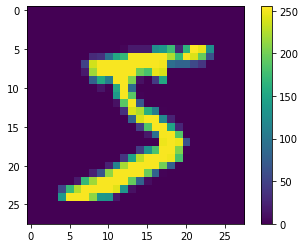

In [13]:
plt.imshow(bild)
plt.colorbar()

In [14]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

# Vorbereitung der Implementierung

## Erzeugen der Targets

In [15]:
y_train[:30]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7], dtype=uint8)

In [16]:
from sklearn.preprocessing import OneHotEncoder

def one_hot(labels):
    enc = OneHotEncoder()
    enc.fit(labels.reshape(-1,1))
    one_hot_kodierung = enc.transform(labels.reshape(-1,1)).toarray()
    return one_hot_kodierung

In [17]:
one_hot_kodierung = one_hot(y_train)

In [18]:
one_hot_kodierung[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

## Bilder sind 2D Inputs, KNN erwartet 1D Input

In [19]:
bild.shape

(28, 28)

In [20]:
28*28

784

In [21]:
v = bild.reshape(-1)

In [22]:
v

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [23]:
v.shape

(784,)

In [24]:
type(v)

numpy.ndarray

In [25]:
v.ndim

1

In [26]:
bild.ndim

2

In [27]:
import numpy as np
v_mit_bias_input = np.append(v, [1])

In [28]:
v_mit_bias_input.shape

(785,)

In [29]:
v_mit_bias_input

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

## Erzeugen einer Gewichtsmatrix

In [30]:
nr_inputs = 28**2 + 1

In [31]:
nr_inputs

785

In [32]:
nr_outputs = 10

In [33]:
W = np.zeros( (nr_inputs, nr_outputs) )

In [34]:
W.shape

(785, 10)

In [35]:
W

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
low = -0.1
high = +0.1
W = np.random.uniform( low, high, (nr_inputs, nr_outputs) )

In [37]:
W.shape

(785, 10)

In [38]:
W

array([[ 0.09784852, -0.05157153,  0.00506902, ...,  0.03584121,
         0.02745471, -0.0261944 ],
       [-0.09744854,  0.0989661 , -0.08275567, ...,  0.01155001,
        -0.00708913, -0.039724  ],
       [ 0.02329293, -0.04553588, -0.02267628, ..., -0.05867895,
        -0.02709333, -0.06053824],
       ...,
       [-0.09480801,  0.03062377,  0.08973908, ..., -0.01798253,
         0.09195034, -0.05388481],
       [-0.0071962 ,  0.05926712, -0.0415396 , ..., -0.0088462 ,
         0.08035904,  0.00745261],
       [ 0.03876029,  0.02990874, -0.08156258, ..., -0.05564627,
         0.07828029, -0.08651757]])

## Berechnung des Aktivierungsvektors

In [39]:
v_mit_bias_input.shape

(785,)

In [40]:
inp_matrix = v_mit_bias_input.reshape(1,785)

In [41]:
inp_matrix.ndim

2

In [42]:
inp_matrix.shape

(1, 785)

In [43]:
W.shape

(785, 10)

In [44]:
act = np.matmul(inp_matrix, W)

In [45]:
act.shape

(1, 10)

In [46]:
act

array([[ -97.33097323,  -40.19412801,  146.02770122,  479.51522922,
           1.43427908, -197.09001454,  225.32965065,  262.34830578,
          85.20388598,  -81.9295651 ]])

## Berechnung des Outputvektors

In [47]:
def RELU(x):
    if x < 0:
        return 0
    else:
        return x

In [48]:
RELU(-0.5)

0

In [49]:
RELU(2.4)

2.4

In [50]:
type(act)

numpy.ndarray

In [51]:
act.shape

(1, 10)

In [52]:
# RELU(act)

In [53]:
RELU_vecfunc = np.vectorize(RELU, otypes=[float] )

In [54]:
out = RELU_vecfunc(act)

In [55]:
out

array([[  0.        ,   0.        , 146.02770122, 479.51522922,
          1.43427908,   0.        , 225.32965065, 262.34830578,
         85.20388598,   0.        ]])

In [56]:
act

array([[ -97.33097323,  -40.19412801,  146.02770122,  479.51522922,
           1.43427908, -197.09001454,  225.32965065,  262.34830578,
          85.20388598,  -81.9295651 ]])

## Berechnung des Fehlervektors

In [57]:
out

array([[  0.        ,   0.        , 146.02770122, 479.51522922,
          1.43427908,   0.        , 225.32965065, 262.34830578,
         85.20388598,   0.        ]])

In [58]:
out.shape

(1, 10)

In [59]:
out1D = out.reshape(-1)

In [60]:
out1D

array([  0.        ,   0.        , 146.02770122, 479.51522922,
         1.43427908,   0.        , 225.32965065, 262.34830578,
        85.20388598,   0.        ])

In [61]:
out1D.shape

(10,)

In [62]:
target_vector = one_hot_kodierung[0,:]

In [63]:
target_vector.shape

(10,)

In [64]:
target_vector

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [65]:
error_vector = target_vector - out1D

In [66]:
error_vector

array([   0.        ,    0.        , -146.02770122, -479.51522922,
         -1.43427908,    1.        , -225.32965065, -262.34830578,
        -85.20388598,    0.        ])

## Berechnung aller Gewichtsänderungen

In [67]:
nr_outputs

10

In [68]:
nr_inputs

785

In [69]:
v_mit_bias_input.shape

(785,)

In [70]:
alpha = 0.001

for out_neuron_nr in range(0,nr_outputs):
    for inp_nr in range(0,nr_inputs):
        weight = W[inp_nr, out_neuron_nr]
        
        # Compute weight change for the current weight
        # based on the Perceptron Learning Rule
        delta_weight = v_mit_bias_input[inp_nr] * error_vector[out_neuron_nr] * alpha
        
        # Learning happens here!
        W[inp_nr, out_neuron_nr] += delta_weight        

# Einzelteile zusammensetzen zu einem Programm

In [71]:
import tensorflow as tf
import numpy as np
import random
from sklearn.preprocessing import OneHotEncoder


def one_hot(labels):
    enc = OneHotEncoder()
    enc.fit(labels.reshape(-1,1))
    one_hot_kodierung = enc.transform(labels.reshape(-1,1)).toarray()
    return one_hot_kodierung


def act_func_relu_scalar(x):
    if x < 0:
        return 0
    else:
        return x
    
act_func_relu_vector = np.vectorize(act_func_relu_scalar, otypes=[float] )


def preprocess_data(M):
    M = M.astype(float)
    M = M * (1.0/255.0)
    return M    


def prepare_data():
    
    # 1. load MNIST data
    mnist_dataset = tf.keras.datasets.mnist
    (x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()
    
    # 2. map image pixel values from [0,255] to [0,1]
    x_train = preprocess_data(x_train)
    x_test  = preprocess_data(x_test)
        
    # 3. map train data target labels to one-hot encoded vectors
    y_train_onehot = one_hot(y_train)
    
    # 4. map test data target labels to one-hot encoded vectors
    y_test_onehot = one_hot(y_test)
    
    return x_train, y_train_onehot, \
           x_test,  y_test_onehot


def perceptron_predict(image,W):
        
    # 1. transform 2D input image (28x28 pixel) to 1D vector
    v = image.reshape(-1)
    
    # 2. add bias input to input vector v
    v_mit_bias_input = np.append(v, [1])
    
    # 3. compute activations of all <nr_outputs> output neurons
    act = np.matmul(v_mit_bias_input, W)
        
    # 4. compute output vector given activation vector
    out = act_func_relu_vector(act)
    
    return v_mit_bias_input, out
    
    

def preceptron_train(v_with_add_bias_input,y,t,W):
    
    # 1. compute error for each of the output neurons
    error_vector = t - y
    
    # 2. define learning rate
    alpha = 0.001
    
    # 3. for all output neurons ...
    for out_neuron_nr in range(0,nr_outputs):
        
        # for all inputs of that output neuron ...
        for inp_nr in range(0,nr_inputs):
            
            # compute weight change for the current weight
            # based on the Perceptron learning rule
            delta_weight = v_with_add_bias_input[inp_nr] *  \
                           error_vector[out_neuron_nr] *    \
                           alpha

            # Learning happens here!
            W[inp_nr, out_neuron_nr] += delta_weight

            
            
def perceptron_test(x_test, y_test, W):
    
    nr_test_samples = x_test.shape[0]
    
    correct = 0
    for sample_id in range(0,nr_test_samples):

        # get next test sample
        image       = x_test[sample_id]
        teacher_vec = y_test[sample_id]
        
        # compute prediction vector
        _, pred_vec = perceptron_predict(image,W)
        
        # compute predicted label
        pred_label = np.argmax(pred_vec)
        
        # get actual label
        gt_label = np.argmax(teacher_vec)
        
        #print("pred: {0} vs. gt: {1}".format(pred_label, gt_label))
        
        # was the predicted label correct?
        if pred_label == gt_label:
            correct += 1
            
    acc = correct/nr_test_samples
    return acc

# Trainieren des Perzeptrons

In [72]:
# 1. get training data
x_train, y_train, x_test, y_test = prepare_data()


# 2. prepare a weight matrix for the Perceptron
nr_inputs = 28**2 + 1
nr_outputs = 10
low = -1.0
high = +1.0
W = np.random.uniform( low, high, (nr_inputs, nr_outputs) )


# 3. training
nr_train_samples = x_train.shape[0]
accs = []
HOW_MANY_STEPS_TO_TRAIN = 100000
    
# for each training sample in the training dataset ...
correct = 0    
for train_step_nr in range(0,HOW_MANY_STEPS_TO_TRAIN):

    # get next training sample
    sample_id   = np.random.randint(0,nr_train_samples)
    image       = x_train[sample_id]
    teacher_vec = y_train[sample_id]

    # compute prediction vector
    v_with_add_bias_input, pred_vec = perceptron_predict(image,W)

    # compute predicted label
    pred_label = np.argmax(pred_vec)

    # get actual label
    gt_label = np.argmax(teacher_vec)

    #print("pred: {0} vs. gt: {1}".format(pred_label, gt_label))

    if pred_label == gt_label:
        correct += 1

    # adapt weights due to error
    # and according to Perceptron learning rule?        
    preceptron_train(v_with_add_bias_input,pred_vec,teacher_vec,W)

    if train_step_nr % 100 == 0:
        acc = perceptron_test(x_test, y_test, W)
        print("train step: {0} --> test data set accuracy: {1:.3f}".format(train_step_nr, acc))

        accs.append(acc)

print("\nfinished!")

train step: 0 --> test data set accuracy: 0.125
train step: 100 --> test data set accuracy: 0.120
train step: 200 --> test data set accuracy: 0.125
train step: 300 --> test data set accuracy: 0.126
train step: 400 --> test data set accuracy: 0.129
train step: 500 --> test data set accuracy: 0.132
train step: 600 --> test data set accuracy: 0.137
train step: 700 --> test data set accuracy: 0.140
train step: 800 --> test data set accuracy: 0.140
train step: 900 --> test data set accuracy: 0.143
train step: 1000 --> test data set accuracy: 0.149
train step: 1100 --> test data set accuracy: 0.152
train step: 1200 --> test data set accuracy: 0.155
train step: 1300 --> test data set accuracy: 0.162
train step: 1400 --> test data set accuracy: 0.163
train step: 1500 --> test data set accuracy: 0.168
train step: 1600 --> test data set accuracy: 0.169
train step: 1700 --> test data set accuracy: 0.171
train step: 1800 --> test data set accuracy: 0.178
train step: 1900 --> test data set accuracy

train step: 16000 --> test data set accuracy: 0.454
train step: 16100 --> test data set accuracy: 0.459
train step: 16200 --> test data set accuracy: 0.457
train step: 16300 --> test data set accuracy: 0.451
train step: 16400 --> test data set accuracy: 0.469
train step: 16500 --> test data set accuracy: 0.464
train step: 16600 --> test data set accuracy: 0.461
train step: 16700 --> test data set accuracy: 0.452
train step: 16800 --> test data set accuracy: 0.452
train step: 16900 --> test data set accuracy: 0.447
train step: 17000 --> test data set accuracy: 0.440
train step: 17100 --> test data set accuracy: 0.443
train step: 17200 --> test data set accuracy: 0.456
train step: 17300 --> test data set accuracy: 0.473
train step: 17400 --> test data set accuracy: 0.462
train step: 17500 --> test data set accuracy: 0.463
train step: 17600 --> test data set accuracy: 0.463
train step: 17700 --> test data set accuracy: 0.464
train step: 17800 --> test data set accuracy: 0.463
train step: 

train step: 31800 --> test data set accuracy: 0.532
train step: 31900 --> test data set accuracy: 0.544
train step: 32000 --> test data set accuracy: 0.536
train step: 32100 --> test data set accuracy: 0.537
train step: 32200 --> test data set accuracy: 0.550
train step: 32300 --> test data set accuracy: 0.550
train step: 32400 --> test data set accuracy: 0.549
train step: 32500 --> test data set accuracy: 0.541
train step: 32600 --> test data set accuracy: 0.533
train step: 32700 --> test data set accuracy: 0.536
train step: 32800 --> test data set accuracy: 0.537
train step: 32900 --> test data set accuracy: 0.545
train step: 33000 --> test data set accuracy: 0.551
train step: 33100 --> test data set accuracy: 0.556
train step: 33200 --> test data set accuracy: 0.553
train step: 33300 --> test data set accuracy: 0.549
train step: 33400 --> test data set accuracy: 0.547
train step: 33500 --> test data set accuracy: 0.547
train step: 33600 --> test data set accuracy: 0.552
train step: 

train step: 47600 --> test data set accuracy: 0.570
train step: 47700 --> test data set accuracy: 0.589
train step: 47800 --> test data set accuracy: 0.589
train step: 47900 --> test data set accuracy: 0.587
train step: 48000 --> test data set accuracy: 0.581
train step: 48100 --> test data set accuracy: 0.566
train step: 48200 --> test data set accuracy: 0.564
train step: 48300 --> test data set accuracy: 0.565
train step: 48400 --> test data set accuracy: 0.574
train step: 48500 --> test data set accuracy: 0.586
train step: 48600 --> test data set accuracy: 0.586
train step: 48700 --> test data set accuracy: 0.577
train step: 48800 --> test data set accuracy: 0.569
train step: 48900 --> test data set accuracy: 0.577
train step: 49000 --> test data set accuracy: 0.575
train step: 49100 --> test data set accuracy: 0.582
train step: 49200 --> test data set accuracy: 0.578
train step: 49300 --> test data set accuracy: 0.580
train step: 49400 --> test data set accuracy: 0.588
train step: 

train step: 63400 --> test data set accuracy: 0.619
train step: 63500 --> test data set accuracy: 0.605
train step: 63600 --> test data set accuracy: 0.621
train step: 63700 --> test data set accuracy: 0.622
train step: 63800 --> test data set accuracy: 0.627
train step: 63900 --> test data set accuracy: 0.628
train step: 64000 --> test data set accuracy: 0.625
train step: 64100 --> test data set accuracy: 0.630
train step: 64200 --> test data set accuracy: 0.630
train step: 64300 --> test data set accuracy: 0.614
train step: 64400 --> test data set accuracy: 0.625
train step: 64500 --> test data set accuracy: 0.627
train step: 64600 --> test data set accuracy: 0.617
train step: 64700 --> test data set accuracy: 0.616
train step: 64800 --> test data set accuracy: 0.615
train step: 64900 --> test data set accuracy: 0.605
train step: 65000 --> test data set accuracy: 0.604
train step: 65100 --> test data set accuracy: 0.599
train step: 65200 --> test data set accuracy: 0.584
train step: 

train step: 79200 --> test data set accuracy: 0.630
train step: 79300 --> test data set accuracy: 0.634
train step: 79400 --> test data set accuracy: 0.622
train step: 79500 --> test data set accuracy: 0.623
train step: 79600 --> test data set accuracy: 0.620
train step: 79700 --> test data set accuracy: 0.640
train step: 79800 --> test data set accuracy: 0.638
train step: 79900 --> test data set accuracy: 0.637
train step: 80000 --> test data set accuracy: 0.621
train step: 80100 --> test data set accuracy: 0.629
train step: 80200 --> test data set accuracy: 0.625
train step: 80300 --> test data set accuracy: 0.640
train step: 80400 --> test data set accuracy: 0.633
train step: 80500 --> test data set accuracy: 0.634
train step: 80600 --> test data set accuracy: 0.639
train step: 80700 --> test data set accuracy: 0.645
train step: 80800 --> test data set accuracy: 0.635
train step: 80900 --> test data set accuracy: 0.636
train step: 81000 --> test data set accuracy: 0.635
train step: 

train step: 95000 --> test data set accuracy: 0.636
train step: 95100 --> test data set accuracy: 0.637
train step: 95200 --> test data set accuracy: 0.644
train step: 95300 --> test data set accuracy: 0.643
train step: 95400 --> test data set accuracy: 0.651
train step: 95500 --> test data set accuracy: 0.658
train step: 95600 --> test data set accuracy: 0.650
train step: 95700 --> test data set accuracy: 0.653
train step: 95800 --> test data set accuracy: 0.663
train step: 95900 --> test data set accuracy: 0.652
train step: 96000 --> test data set accuracy: 0.648
train step: 96100 --> test data set accuracy: 0.648
train step: 96200 --> test data set accuracy: 0.643
train step: 96300 --> test data set accuracy: 0.644
train step: 96400 --> test data set accuracy: 0.650
train step: 96500 --> test data set accuracy: 0.657
train step: 96600 --> test data set accuracy: 0.646
train step: 96700 --> test data set accuracy: 0.647
train step: 96800 --> test data set accuracy: 0.652
train step: 

# Plotten der Lernkurve

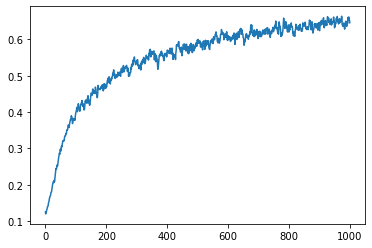

In [73]:
from matplotlib import pyplot as plt
plt.plot(accs)
plt.show()

# Abspeichern der gelernten Gewichte

In [74]:
import pickle
fname = "perceptron_100000_training_steps.pkl"
fobj = open(fname, "wb")
pickle.dump(W, fobj)
fobj.close()

# Wiederherstellen der Gewichte

In [75]:
# das Notebook kann jetzt geschlossen werden bzw.
# der Python-Kernel kann neu gestartet werden
# die Matrix W wird dadurch "vergessen":
W

array([[ 0.57327247,  0.55545469, -0.35526454, ..., -0.99340496,
        -0.42739979,  0.56278449],
       [ 0.69627543,  0.20354608, -0.10167713, ..., -0.46279382,
         0.28081557, -0.72960377],
       [-0.14536995,  0.25697883, -0.47680672, ...,  0.74428275,
        -0.34508846,  0.97278585],
       ...,
       [ 0.18967043, -0.13735519, -0.15539483, ...,  0.07853021,
         0.21982111,  0.43844751],
       [-0.03277297,  0.50449205, -0.24043327, ...,  0.54876557,
         0.8147887 ,  0.98016646],
       [-0.61941797,  0.48712907, -0.61544163, ..., -0.11563309,
        -1.37309973, -0.62220244]])

In [76]:
# jetzt wird die Gewichtsmatrix W wiederhergestellt
import pickle
fname = "perceptron_100000_training_steps.pkl"
fobj = open(fname, "rb")
W = pickle.load(fobj)

In [77]:
W.shape

(785, 10)

In [78]:
W

array([[ 0.57327247,  0.55545469, -0.35526454, ..., -0.99340496,
        -0.42739979,  0.56278449],
       [ 0.69627543,  0.20354608, -0.10167713, ..., -0.46279382,
         0.28081557, -0.72960377],
       [-0.14536995,  0.25697883, -0.47680672, ...,  0.74428275,
        -0.34508846,  0.97278585],
       ...,
       [ 0.18967043, -0.13735519, -0.15539483, ...,  0.07853021,
         0.21982111,  0.43844751],
       [-0.03277297,  0.50449205, -0.24043327, ...,  0.54876557,
         0.8147887 ,  0.98016646],
       [-0.61941797,  0.48712907, -0.61544163, ..., -0.11563309,
        -1.37309973, -0.62220244]])

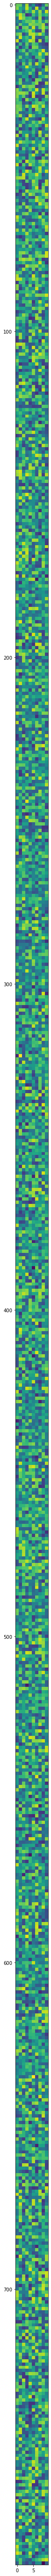

In [79]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,100))
plt.imshow(W)
plt.show()

# Testen des Netzes

In [80]:
import cv2

testbild = x_test[2,:,:]
testbild = preprocess_data(testbild)

In [81]:
type(testbild)

numpy.ndarray

In [82]:
testbild.shape

(28, 28)

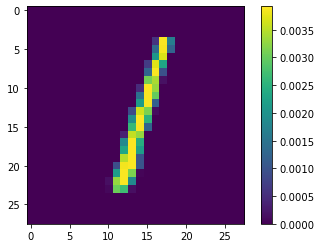

In [83]:
from matplotlib import pyplot as plt
plt.imshow(testbild)
plt.colorbar()

In [84]:
_, pred_vec = perceptron_predict(testbild, W)

In [85]:
pred_vec

array([0.        , 0.48799551, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [86]:
np.argmax(pred_vec)

1